## 1. abgeordnetenwatch.de

abgeordnetenwatch.de is a website that allows to ask questions to politicians online and receive answers. They also provide an API to obtain data on politicians: https://www.abgeordnetenwatch.de/api/

Use the API to obtain data of all candidates for the state parliament of bavaria. Put together a pandas dataframe with five columns: 
* first name
* last name
* party
* gender
* age (you can calculate it from the birthyear)

Store this data frame in a variable called 'df_politicians'. 


In [1]:
import numpy as np
import pandas as pd
import requests
api_url = "https://www.abgeordnetenwatch.de/api/parliament/bayern/candidates.json"
df = pd.DataFrame(columns=['first name', 'last name', 'party', 'gender', 'age'])
#print(df)
result = requests.get(api_url).json()
first_name = []
last_name = []
party = []
gender = []
age = []
for profile in result['profiles']:
    first_name.append(profile['personal']['first_name'])
    last_name.append(profile['personal']['last_name'])
    party.append(profile['party'])
    gender.append(profile['personal']['gender'])
    if profile['personal']['birthyear']!=None:
        age.append(2019 - int(profile['personal']['birthyear']))
    else:
        age.append(np.NaN)
    
df['first name']=first_name
df['last name']=last_name
df['party']=party
df['gender']=gender 
df['age']=age
print(df.head())

  first name    last name         party gender   age
0    Florian        Weber  BAYERNPARTEI   male  56.0
1     Jürgen  Osterlänger           ÖDP   male  61.0
2     Jürgen       Wagner  BAYERNPARTEI   male  57.0
3      Peter       Limmer           ÖDP   male  53.0
4     Thomas       Müller           ÖDP   male  65.0


What is the most frequent last name in the parliament?

In [2]:
df['last name'].value_counts()[:1]

Müller    9
Name: last name, dtype: int64

Compute the gender ratio (i.e., % of female deputies) for each party. Store the results in a dictionary with the name 'gender_ratios' with the party name as key and the percentage of females as value.

Visualize results in a bar chart.

{'AfD': 9.89010989010989, 'BAYERNPARTEI': 12.222222222222221, 'CSU': 21.978021978021978, 'DIE GRÜNEN': 31.868131868131865, 'DIE LINKE': 15.384615384615385, 'Die Franken': 22.22222222222222, 'Die PARTEI': 10.344827586206897, 'FDP': 14.285714285714285, 'FREIE WÄHLER': 26.373626373626376, 'Liberal-Konservative Reformer': 33.33333333333333, 'PIRATEN': 4.3478260869565215, 'Partei für Gesundheitsforschung': 50.0, 'SPD': 31.868131868131865, 'Tierschutzpartei': 57.14285714285714, 'V-Partei³': 53.84615384615385, 'mut Bayern': 41.86046511627907, 'ÖDP': 26.373626373626376}
__________________________________________________________________________________________
TICKS LEGEND

{'AfD': 0, 'BAYERNPARTEI': 1, 'CSU': 2, 'DIE GRÜNEN': 3, 'DIE LINKE': 4, 'Die Franken': 5, 'Die PARTEI': 6, 'FDP': 7, 'FREIE WÄHLER': 8, 'Liberal-Konservative Reformer': 9, 'PIRATEN': 10, 'Partei für Gesundheitsforschung': 11, 'SPD': 12, 'Tierschutzpartei': 13, 'V-Partei³': 14, 'mut Bayern': 15, 'ÖDP': 16}


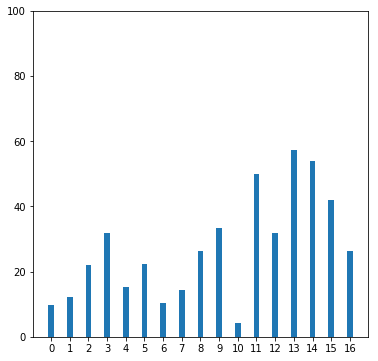

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
f_dict = df[df["gender"]=='female'].groupby(["party","gender"]).size().unstack().sort_values(by='party').to_dict()['female']
m_count_dict = df.party.value_counts().sort_index().to_dict()
gender_ratios = {k: float(f_dict[k])/m_count_dict[k]*100 for k in f_dict}
print(gender_ratios)
ticks = {k:c for c, k in enumerate(gender_ratios.keys())}
print('__________________________________________________________________________________________\nTICKS LEGEND\n')
print(ticks)

fig = plt.figure(figsize=(6,6))
plt.bar(range(len(f_dict.keys())),gender_ratios.values(), tick_label=list(ticks.values()), align='center', width=0.3)
plt.ylim(0, 100);

Compare the age distribution for the green party and the conservative CSU party. 
For this, plot a semi-transparent histogram (comparable to this: https://i.stack.imgur.com/UI5c0.png) with the age distribution of the two parties

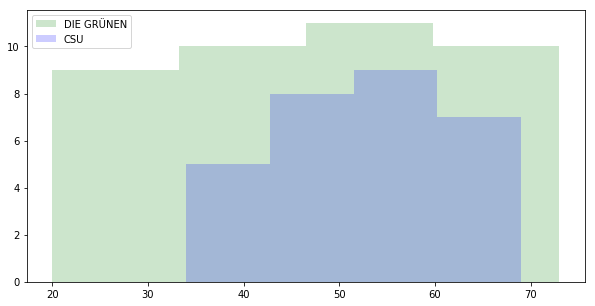

In [22]:
import seaborn as sns
df.head(5)
parties=['DIE GRÜNEN', 'CSU']
colors=['green', 'blue']
fig, ax = plt.subplots(figsize=(10, 5))
for c, party in enumerate(parties): 
    age_grunen = df[df["party"]==party].groupby(["age", "party"]).size().unstack().to_dict()[party]
    sns.distplot(list(age_grunen.keys()), ax=ax, kde=False, label = parties[c], color= colors[c], hist_kws = {"alpha":0.2});
    ax.legend()



## 2. History in Wikipedia

Download the html text from the article 'History_of_Germany' from the English Wikipedia. Store the results in a string 'full_html'

In [117]:
#usage of this library explained in bottom section of next cell 
import wikipedia
full_html = wikipedia.page("History of Germany")
all_links = full_html.links
#print(all_links[:10])
print("LINKS: \n", sorted(all_links)[:10], "\n")
full_html = full_html.content
print("HTML TEXT: \n", full_html)

LINKS: 
 ['1871 German federal election', '18th century history of Germany', '18th-century history of Germany', '1918 flu pandemic', '1920s German inflation', '1936 Summer Olympics', '95 Theses', 'AD', 'Aachen', 'Absolute monarchy'] 

HTML TEXT: 
 The concept of Germany as a distinct region in central Europe can be traced to Roman commander Julius Caesar, who referred to the unconquered area east of the Rhine as Germania, thus distinguishing it from Gaul (France), which he had conquered. The victory of the Germanic tribes in the Battle of the Teutoburg Forest (AD 9) prevented annexation by the Roman Empire, although the Roman provinces of Germania Superior and Germania Inferior were established along the Rhine. Following the Fall of the Western Roman Empire, the Franks conquered the other West Germanic tribes. When the Frankish Empire was divided among Charles the Great's heirs in 843, the eastern part became East Francia. In 962, Otto I became the first Holy Roman Emperor of the Holy 

Extract all links to other Wikipedia page from this article. Store them in a list called 'all_links' in alphabetical order of the target article name.

In [121]:
#using wikipedia API
import requests
api_url = 'https://en.wikipedia.org/w/api.php'
hog_param={'action': 'query',
            'titles': 'History of Germany',
            'prop': 'links',
            'pllimit':'500',
            'rvlimit': 'max',
            'continue':'',
            'format': 'json'}

result = requests.get(url = api_url, params = hog_param, timeout=30)
hog_json = result.json()
links = hog_json['query']['pages']['13224']['links']
all_links = [link['title'] for link in links][:10]
print("LINKS: \n", all_links, "\n")

hog_param={'action': 'query',
            'titles': 'History of Germany',
            'prop': 'revisions',
            'rvprop':'content',
            'rvlimit': '1',
            'format': 'json'}
result = requests.get(url = api_url, params = hog_param, timeout=30)
hog_json = result.json()
full_html_with_trash = hog_json['query']['pages']['13224']['revisions'][0]
print("HTML TEXT WITH UNNECESSARY ADDITIONS: \n", full_html_with_trash)
#did't use wikipedia api as it gives too much unnecessary additions to text -> process of data-cleansing 
#would not be as fast and precise as with using the wikipedia library  

LINKS: 
 ['1871 German federal election', '18th-century history of Germany', '18th century history of Germany', '1918 flu pandemic', '1920s German inflation', '1936 Summer Olympics', '95 Theses', 'AD', 'Aachen', 'Absolute monarchy'] 

HTML TEXT WITH UNNECESSARY ADDITIONS: 
 {'contentformat': 'text/x-wiki', 'contentmodel': 'wikitext', '*': '{{Redirect|German History|the academic journal|German History (journal)}}\n{{short description|Occurrences and people in Germany throughout history}}\n{{History of Germany}}\nThe concept of [[Germany]] as a distinct region in central Europe can be traced to Roman commander [[Julius Caesar]], who referred to the unconquered area east of the [[Rhine]] as \'\'[[Germania]]\'\', thus distinguishing it from [[Gaul]] (France), which he had conquered. The victory of the [[Cherusci|Germanic tribes]] in the [[Battle of the Teutoburg Forest]] ([[AD]] 9) prevented annexation by the [[Roman Empire]], although the [[Roman provinces]] of [[Germania Superior]] and [

Download the first 10 articles from this list and store the html contents in one string each. Put all strings in a list called 'full_linked_texts'

In [25]:
full_linked_texts = []
for link in all_links[:10]:
    full_linked_texts.append(wikipedia.page(link).content)
print (full_linked_texts[1])

From the 1680s to 1789, Germany comprised many small territories which were parts of the Holy Roman Empire of the German Nation. Prussia finally emerged as dominant. Meanwhile, the states developed a classical culture that found its greatest expression in the Enlightenment, with world class leaders such as philosophers Leibniz and Kant, writers such as Goethe and Schiller, and musicians Bach and Beethoven.


== Military and diplomatic history ==

Germany, or more exactly the old Holy Roman Empire, in the 18th century entered a period of decline that would finally lead to the dissolution of the Empire during the Napoleonic Wars. Since the Peace of Westphalia in 1648, the Empire had been fragmented into numerous independent states (Kleinstaaterei). In 1701, Elector Frederick of Brandenburg was crowned "King in Prussia". From 1713 to 1740, King Frederick William I, also known as the "Soldier King", established a highly centralized state.
The term German dualism describes the long conflict

Write a function 'extract_years (string_input)' that gets a string and returns how often a certain year number from 1000-2019 occurs. You can assume that each number between 1000 and 2019 is a year number. The result is a dictionary with year numbers as keys, and the number of occurrences as values.

Example: extract_years("The king reigned from 1245 to 1268. He died in 1268.") should return the dictionary {1245: 1, 1268:2}

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
def remove_punc(exintro):
    words = tokenizer.tokenize(exintro)
    article = ''
    for w in words:
        if w not in stop_words:
            article += w + ' '
    return article.strip()   

def extract_years(string_input):
    dict_of_years = {}
    str_nopunc = remove_punc(string_input)
    for word in str_nopunc.split():
        if word.isdigit():
            if int(word)>1000 and int(word)<2019:
                if word not in list(dict_of_years.keys()):
                    dict_of_years.update({word:1})
                else: 
                    dict_of_years[word]+=1
    return  dict_of_years
extract_years(full_linked_texts[1])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kravchis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'1789': 2,
 '1648': 3,
 '1701': 4,
 '1713': 3,
 '1740': 6,
 '1866': 2,
 '1688': 1,
 '1700': 2,
 '1720': 1,
 '1472': 1,
 '1537': 1,
 '1744': 2,
 '1748': 1,
 '1756': 2,
 '1763': 4,
 '1772': 4,
 '1786': 1,
 '1793': 3,
 '1795': 4,
 '1803': 2,
 '1806': 6,
 '1804': 2,
 '1918': 1,
 '1640': 1,
 '1914': 1,
 '1750': 4,
 '1800': 2,
 '1770': 4,
 '1783': 1,
 '1781': 1,
 '1760': 3,
 '1785': 1,
 '1820': 1,
 '1737': 1,
 '1815': 4,
 '1809': 2,
 '1849': 1,
 '1871': 1,
 '1830': 1,
 '1780': 1,
 '1757': 1,
 '1831': 1,
 '1850': 1,
 '1870': 1,
 '1679': 1,
 '1754': 1,
 '1805': 2,
 '1749': 1,
 '1832': 1,
 '1759': 1,
 '1685': 1,
 '1732': 1,
 '1791': 1,
 '1724': 1,
 '1792': 2,
 '1807': 1,
 '1813': 2,
 '1812': 1,
 '1814': 1,
 '2007': 1,
 '2016': 2,
 '1600': 1,
 '1947': 1,
 '2006': 1,
 '1840': 1,
 '1961': 1,
 '1477': 1,
 '1992': 1,
 '2002': 2,
 '2001': 1,
 '1867': 1,
 '1991': 1,
 '1989': 1,
 '2011': 1,
 '2009': 1,
 '1998': 1}

Use your function on all 11 downloaded Wikipedia article raw texts to compute the overall number of occurrences for each year number.
Store the aggregated counts (summarized over all articles) in a dictionary called 'overall_counts'

In [41]:
overall_counts = {}
for str_ in full_linked_texts:
    for c, year in enumerate(extract_years(str_)):
        if year not in overall_counts.keys():
            overall_counts[year]= list(extract_years(str_).values())[c]
        else:
            overall_counts[year]+= list(extract_years(str_).values())[c]
#print(sorted(overall_counts.items(),reverse=True))
print(overall_counts)    


{'1871': 3, '1789': 7, '1648': 6, '1701': 8, '1713': 6, '1740': 12, '1866': 4, '1688': 3, '1700': 5, '1720': 2, '1472': 2, '1537': 2, '1744': 4, '1748': 3, '1756': 5, '1763': 8, '1772': 9, '1786': 2, '1793': 6, '1795': 8, '1803': 4, '1806': 12, '1804': 5, '1918': 42, '1640': 3, '1914': 3, '1750': 9, '1800': 6, '1770': 8, '1783': 2, '1781': 2, '1760': 6, '1785': 2, '1820': 2, '1737': 2, '1815': 12, '1809': 7, '1849': 2, '1830': 2, '1780': 2, '1757': 2, '1831': 2, '1850': 2, '1870': 3, '1679': 2, '1754': 2, '1805': 5, '1749': 2, '1832': 2, '1759': 2, '1685': 2, '1732': 2, '1791': 2, '1724': 2, '1792': 4, '1807': 3, '1813': 4, '1812': 2, '1814': 2, '2007': 5, '2016': 12, '1600': 3, '1947': 2, '2006': 6, '1840': 2, '1961': 3, '1477': 2, '1992': 6, '2002': 5, '2001': 6, '1867': 2, '1991': 2, '1989': 3, '2011': 4, '2009': 11, '1998': 5, '1920': 5, '1999': 2, '1917': 8, '2018': 3, '1916': 3, '2014': 5, '1919': 8, '1889': 1, '1890': 1, '2010': 7, '1882': 1, '1913': 3, '1915': 2, '2005': 2, '20

Visualize the numbers of occurrences in a timeline.

NUMBER OF OCCURANCIES IN INTERVALS___________________________________
 [((1054.5263157894738, 1108.0526315789473), 2), ((1161.578947368421, 1215.1052631578948), 5), ((1215.1052631578948, 1268.6315789473683), 0), ((1268.6315789473683, 1322.157894736842), 0), ((1322.157894736842, 1375.6842105263158), 3), ((1375.6842105263158, 1429.2105263157896), 0), ((1429.2105263157896, 1482.7368421052631), 5), ((1482.7368421052631, 1536.2631578947369), 27), ((1536.2631578947369, 1589.7894736842104), 1), ((1589.7894736842104, 1643.3157894736842), 12), ((1643.3157894736842, 1696.842105263158), 18), ((1696.842105263158, 1750.3684210526317), 52), ((1750.3684210526317, 1803.8947368421054), 89), ((1803.8947368421054, 1857.421052631579), 62), ((1857.421052631579, 1910.9473684210525), 34), ((1910.9473684210525, 1964.4736842105262), 157), ((1964.4736842105262, 2018.0), 127)] 

LEGEND________________________________________
 {(1054.5263157894738, 1108.0526315789473): 0, (1161.578947368421, 1215.1052631578948): 

<BarContainer object of 17 artists>

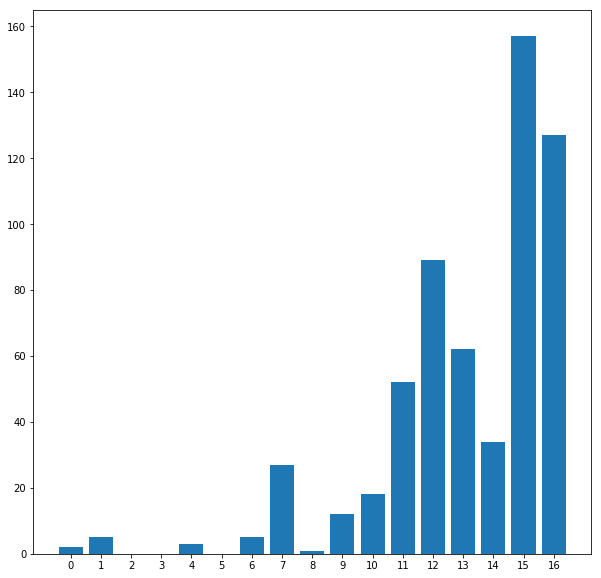

In [122]:
import matplotlib.pyplot as plt
import nltk 
intervals = list(np.linspace(int(min(overall_counts.keys())), int(max(overall_counts.keys())), 20))
intervals = list(nltk.bigrams(intervals))
#print(intervals)
int_dict = {}
for date in overall_counts: 
        for interval in intervals:
            if int(date)>interval[0] and int(date)<interval[1]:
                if interval not in int_dict:
                    int_dict[interval]=0
                else:
                    int_dict[interval]+=overall_counts[date]
sorted_int_dict = sorted(int_dict.items(), key=lambda kv: kv[0][1])
print("NUMBER OF OCCURANCIES IN INTERVALS___________________________________\n", sorted_int_dict, "\n")
keys=[_[0] for _ in sorted_int_dict]
values=[_[1] for _ in sorted_int_dict]

print("LEGEND________________________________________\n", dict(zip(keys, range(len(intervals)))), "\n")

plt.figure(figsize = (10, 10))
plt.bar(range(len(keys)), values, tick_label = range(len(keys)))

#plt.bar(range(len(f_dict.keys())),gender_ratios.values(), tick_label=list(ticks.values()), align='edge', width=0.3)
